# Detección de anomalías ML. One class SVM y DBSSCAN

# Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

Para este ejemplo, generaremos datos sintéticos con clusters bien definidos y algunas anomalías.

# Crear dataset con dos clústers

In [18]:
# Creamos un dataset con dos clústers bien diferenciados
X, Y = make_blobs(n_samples = 300, centers = 2, cluster_std = 1.0, random_state=42)

# Crear dataset datos anómalos

In [19]:
# Añadimos datos anómalos al dataset
np.random.seed(42)
outliers = np.random.uniform(low=10, high=15, size=(20, 2))

# Unión dataset normales y anómalos

In [20]:
# Unimos los outliers al dataset
X = np.vstack([X, outliers])

# Visualización datos

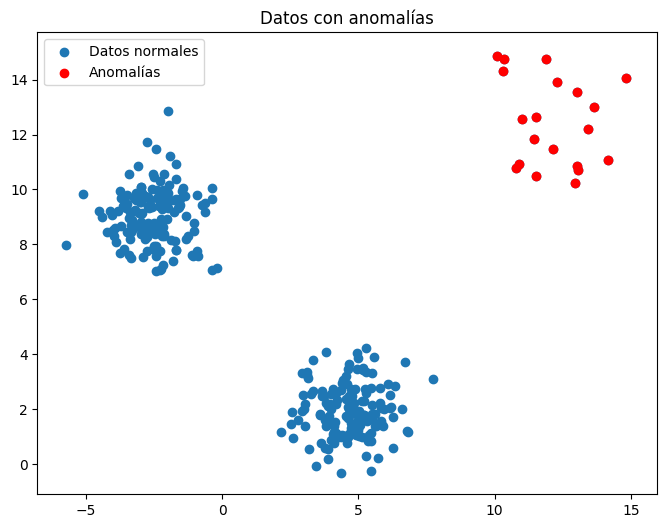

In [21]:
# Visualizamos los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Datos normales")
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label="Anomalías")
plt.legend()
plt.title("Datos con anomalías")
plt.show()

# Aplicamos Isolation Forest

## Normalizamos los datos

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Entrenamiento del modelo

In [24]:
model = IsolationForest(n_estimators = 100, contamination = 0.05, random_state = 42)
model.fit(X_scaled)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

## Predicciones

In [28]:
predictions = model.predict(X_scaled)
print(f'Predicciones: {predictions}')
# Convertimos las predicciones a binario(1 Normal, -1 anormal)
X_normal = X[predictions == 1]
X_anomalies = X[predictions == -1]

Predicciones: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1
 -1  1 -1  1 -1 -1 -1 -1]


# Visualización de resultados

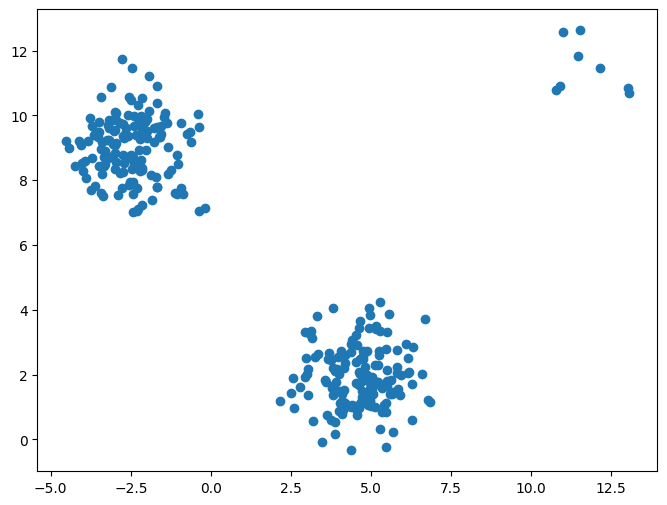

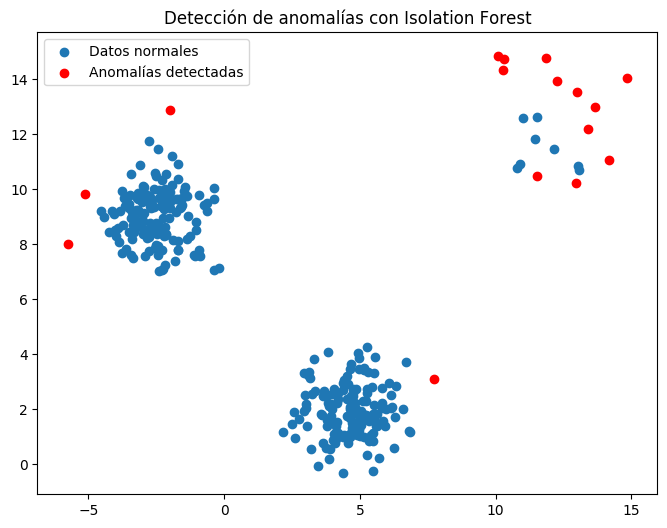

In [29]:
# Visualizamos los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], label="Datos normales")
plt.scatter(X_anomalies[:, 0], X_anomalies[:, 1], color='red', label="Anomalías detectadas")
plt.legend()
plt.title("Detección de anomalías con Isolation Forest")
plt.show()

# Aplicamos ONE-Class SVM

In [30]:
from sklearn.svm import OneClassSVM

## Entrenamos el modelo

In [33]:
model_svm = OneClassSVM(kernel = 'rbf', nu = 0.05, gamma='scale')
model_svm.fit(X_scaled)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

## Realizamos las predicciones

In [34]:
predictions_svm = model_svm.predict(X_scaled)
# Separamos los datos normales y las anomalías
X_normal_svm = X[predictions_svm == 1]
X_anomalies_svm = X[predictions_svm == -1]

## Visualización de resultados

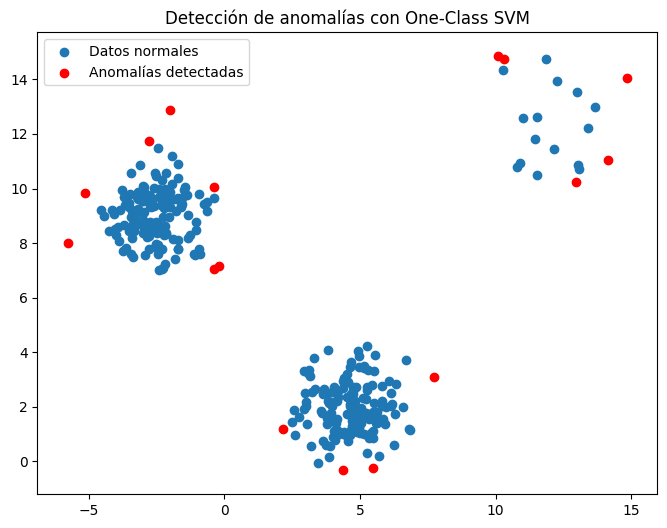

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_normal_svm[:, 0], X_normal_svm[:, 1], label="Datos normales")
plt.scatter(X_anomalies_svm[:, 0], X_anomalies_svm[:, 1], color='red', label="Anomalías detectadas")
plt.legend()
plt.title("Detección de anomalías con One-Class SVM")
plt.show()

# DBScan

In [36]:
from sklearn.cluster import DBSCAN

# Entrenamos el modelo

In [41]:
model_dbscan = DBSCAN(eps=0.1, min_samples = 5)
predictions_dbscan = model_dbscan.fit_predict(X_scaled)
# Los puntos con -1 son considerados como anomalías
X_normal_dbscan = X[predictions_dbscan != -1]
X_anomalies_dbscan = X[predictions_dbscan == -1]

## Visualización de resultados

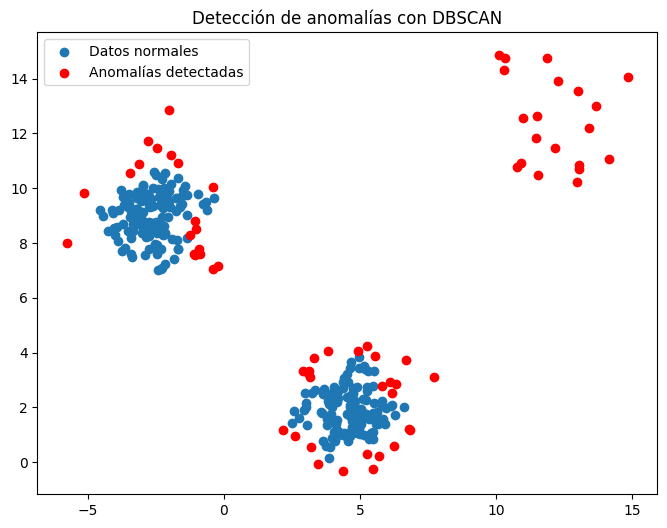

In [42]:
# Visualizamos los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_normal_dbscan[:, 0], X_normal_dbscan[:, 1], label="Datos normales")
plt.scatter(X_anomalies_dbscan[:, 0], X_anomalies_dbscan[:, 1], color='red', label="Anomalías detectadas")
plt.legend()
plt.title("Detección de anomalías con DBSCAN")
plt.show()